# Fandango Movie Ratings Analysis

Fandango is an online movie ratings aggregator. In October 2015, an analysis by Walk Hickey on the movie ratings data revealed that the Fandango's rating system was biased and dishonest. The ratings were generally inflated on the website than the actual ratings by the users.

Fandango;s officials replied that the biased rating was caused by a bug in their system rather than intentional and they promised to fix the bug as soon as possible. Our goal in this project is to analyse more recent movie ratings data to determine whether there has been any change in Fandango;s rating system after Hickey's analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
fandango = pd.read_csv('fandango_score_comparison.csv')
movie_ratings = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
fandango_before = fandango[['FILM','Fandango_Stars','Fandango_Ratingvalue','Fandango_votes','Fandango_Difference']].copy()
print(fandango_before.shape)

(146, 5)


In [3]:
fandango_after = movie_ratings[['movie','year','fandango']].copy()

# Sampling Analysis

Both the samples are neither population representatative nor random samples. This is because of following reasons.

- In case of the fandando ratings before the Hickey's analysis movies with atleast 30 fandango reviews were considered.
- In the case of movie ratings of 2016-2017 , the criteria for movies chosen are one with significant number of votes. We dont know what is considered as significant.

Hence in we will change the goal of our analysis slightly as that seems a easier solution.

# Change of Goal

We will change our goal in view of the purposive sampling performed on the movie ratings. 

We are going to change our goal from determing if there is any change to fandango's ratings after Hickey's analysis to see if there is change in fandango's ratings in 2016 compared to 2015. This new goal will act as a proxy to the previous goal.



In [4]:
fandango_before['Fandango_votes'].min()

35

In [5]:
random_movie = fandango_after.sample(10,random_state=1).rename(columns={'movie':'FILM'})
print(random_movie)

                                        FILM  year  fandango
108                   Mechanic: Resurrection  2016       4.0
206                                 Warcraft  2016       4.0
106                                Max Steel  2016       3.5
107                            Me Before You  2016       4.5
51   Fantastic Beasts and Where to Find Them  2016       4.5
33                                      Cell  2016       3.0
59                                    Genius  2016       3.5
152                                    Sully  2016       4.5
4                    A Hologram for the King  2016       3.0
31                Captain America: Civil War  2016       4.5


In [6]:
fandango_before['Year']= fandango_before['FILM'].str[-5:-1]
fandango_before_2015 = fandango_before[fandango_before['Year']=='2015']
print(fandango_before_2015.head(3))
fandango_after_2015 = fandango_after[fandango_after['year']==2015]
print(fandango_after_2015.head(n=3))
fandango_after_2016 =  fandango_after[fandango_after['year']==2016]
print(fandango_after_2016.head(n=3))
fandango_before_2016 = fandango_before[fandango_before['Year']=='2016']


                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   

   Fandango_votes  Fandango_Difference  Year  
0           14846                  0.5  2015  
1           12640                  0.5  2015  
2           12055                  0.5  2015  
Empty DataFrame
Columns: [movie, year, fandango]
Index: []
                 movie  year  fandango
0  10 Cloverfield Lane  2016       3.5
1             13 Hours  2016       4.5
2  A Cure for Wellness  2016       3.0


Since the datasets have multiple years. We have separated the 2015 and 2016 ratings for our comparisons.

# 2015 vs 2016 Rating Analysis

In [7]:
import seaborn as sns
import numpy as np
%matplotlib inline

In [8]:
plt.style.use('fivethirtyeight')
xlabels = np.arange(0,5.1,0.5)
print(xlabels)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


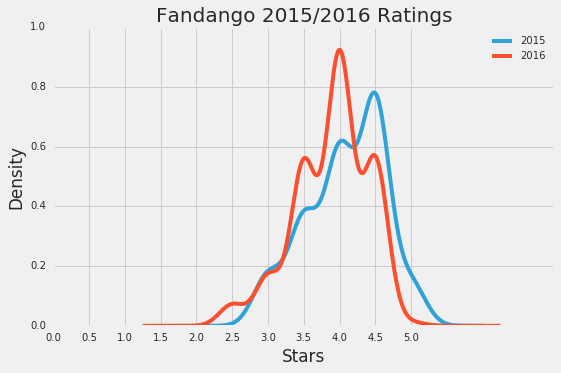

In [9]:
fandango_before_2015['Fandango_Stars'].plot.kde(label='2015',legend=True,figsize=(8,5))
fandango_after_2016['fandango'].plot.kde(label='2016',legend=True)
plt.title('Fandango 2015/2016 Ratings',fontsize=20)
plt.xlabel('Stars')
plt.xticks(xlabels)
plt.show()




- Both the distributions are left skewed. 
- The 2016 data is slightly shifted to the left compared to 2015 data.

The left skew suggests that the ratings are more towards high or very high ratings. Looking at the 2 density plots we can clearly see that the 2016 movies has slightly lower rating compared to 2015 movies.

We can also see the direction of the difference as 2016's movies has a slightly lower ratings.

# Frequency Distribution Analysis

Since the 2 samples have different number of movies , it does not make sense to compare absolute frequencies.

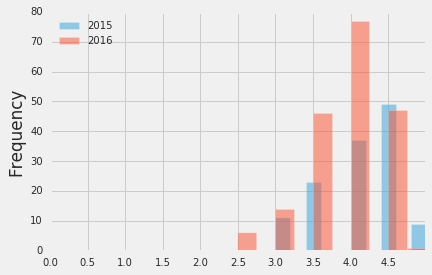

In [10]:
intervals = pd.interval_range(start=0.,end=5.,freq=0.5)
freq_2015 = pd.Series(index=intervals,data=[0]*10)
freq_2016 = pd.Series(index=intervals,data=[0]*10)
def construct_freq(df,freq):
    for value in df:
        for i in intervals:
            if value in i:
                freq.loc[i] +=1
    return freq

freq_2015 = construct_freq(fandango_before_2015['Fandango_Stars'],freq_2015)
freq_2016 = construct_freq(fandango_after_2016['fandango'],freq_2016)
freq_2015 = (freq_2015 / freq_2015.sum())*100
freq_2016 = (freq_2016 / freq_2016.sum())*100
fandango_before_2015['Fandango_Stars'].plot.hist(xticks=np.arange(0,5,0.5),label='2015',alpha=0.5,legend=True)
fandango_after_2016['fandango'].plot.hist(xticks=np.arange(0,5,0.5),label='2016',alpha=0.5,legend=True)
plt.show()


In [12]:
print(freq_2015)
print(freq_2016)
print(fandango_before_2015['Fandango_Stars'].describe())
print(fandango_after_2016['fandango'].describe())

(0.0, 0.5]     0.000000
(0.5, 1.0]     0.000000
(1.0, 1.5]     0.000000
(1.5, 2.0]     0.000000
(2.0, 2.5]     0.000000
(2.5, 3.0]     8.527132
(3.0, 3.5]    17.829457
(3.5, 4.0]    28.682171
(4.0, 4.5]    37.984496
(4.5, 5.0]     6.976744
dtype: float64
(0.0, 0.5]     0.000000
(0.5, 1.0]     0.000000
(1.0, 1.5]     0.000000
(1.5, 2.0]     0.000000
(2.0, 2.5]     3.141361
(2.5, 3.0]     7.329843
(3.0, 3.5]    24.083770
(3.5, 4.0]    40.314136
(4.0, 4.5]    24.607330
(4.5, 5.0]     0.523560
dtype: float64
count    129.000000
mean       4.085271
std        0.538096
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Fandango_Stars, dtype: float64
count    191.000000
mean       3.887435
std        0.509540
min        2.500000
25%        3.500000
50%        4.000000
75%        4.250000
max        5.000000
Name: fandango, dtype: float64


From the above frequency table distributions we see more 3.5-4.0 range ratings in 2016 compared 2015. We saw about 28% of the sample in the range in 2015 compared to 40% of the sample in 2016. 
We also see 3% of the sample in the 2.0-2.5 rating range in 2016 which was absent in the 2015.

About 40% of the ratings are in 3.5-4.0 range in 2016 and about 37% of the ratings are in 4.0-4.5 range in 2015. These frequency distribution clearly shows the direction of the difference.

In [17]:
mean_2015 = fandango_before_2015['Fandango_Stars'].mean()
mode_2015 = fandango_before_2015['Fandango_Stars'].mode()[0]
median_2015 = fandango_before_2015['Fandango_Stars'].median()
mean_2016 = fandango_after_2016['fandango'].mean()
mode_2016 = fandango_after_2016['fandango'].mode()[0]
median_2016 = fandango_after_2016['fandango'].median()
summary = pd.DataFrame()
summary['2015'] = [mean_2015,mode_2015,median_2015]
summary['2016'] = [mean_2016,mode_2016,median_2016]
summary.index = ['mean','mode','median']
summary

,2015,2016
mean,4.085271,3.887435
mode,4.500000,4.000000
median,4.000000,4.000000


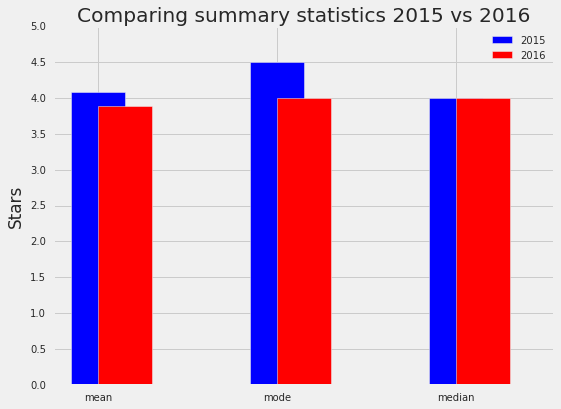

In [31]:
summary['2015'].plot.bar(label='2015',color='blue',align='center',ylim=(0,5),legend=True,rot=0,figsize=(8,6),width=0.3)
summary['2016'].plot.bar(label='2016',color='red',align='edge',ylim=(0,5),legend=True,rot=0,width=0.3)
plt.ylabel('Stars')
plt.yticks(np.arange(0,5.1,0.5))
plt.title('Comparing summary statistics 2015 vs 2016')
plt.show()

- By comparing the mean, mode and median, the median hasnt changed but the mean is marginal less in 2016 compared to 2015 and mode is 0.5 lower in 2016 compared to 2015. 

- There is only a slight difference in the ratings and the magnitude if we take a look at the mode which is the highest frequency of the rating, more movies are rated 4.0 in 2016 compared to 4.5 in 2015. The magnitide of difference is 0.5 in terms of mode for the 2 samples.


# Conclusion

By comparing the 2 samples, we definitely see that ratings has changed slightly in 2016 after Hickey's analysis. We are not sure what changed but it looks like the fandango biased ratings seems to be fixed.